# Домашнее задание по теме «Ансамблирование»

**Преподаватель:** Наталья Баданина, Юлия Пономарева

**Цель:** применить на практике базовые ансамбливые методы

**Описание задания:**

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочитать в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Подготовьте датасет к обучению моделей.

   a) Категориальные переменные переведите в цифровые значения. Можно использовать [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Старайтесь не использовать для этой задачи циклы.

   b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:

   a) [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

   b) [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.
6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.
7. Обучите бэггинг над моделью из п. 4a. Используйте [ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

   a) Повторите п. 5
8. Обучите стекинг трех моделей: из п. 4a, п. 4b и [svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). Используйте [ensemble.StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html).

   a) Повторите п. 5
9. Сформулируйте выводы по проделанной работе.

   a) Сравните метрики построенных моделей.
   
   b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

# 1. Получение данных и подготовка датасета

Для начала загрузим данные с сайта и посмотрим на первые строки датасета:

In [90]:
import pandas as pd

# Загрузка CSV-файла
df = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Rabota_s_priznakami_i_postroenie_modelej/Ansamblirovanie/heart.csv')

# Предварительный просмотр данных
print(df.head())  # Вывод первых нескольких строк данных

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Датасет содержит информацию о 11 признаках, которые могут быть использованы для прогнозирования возможного наличия сердечной болезни. Эти признаки включают возраст пациента, его пол, тип боли в груди, кровяное давление в состоянии покоя, уровень холестерина, уровень сахара в крови натощак, результаты электрокардиограммы в состоянии покоя, максимальную частоту сердечных сокращений, наличие или отсутствие стенокардии при физической нагрузке, значение старого пика и наклон пика ST при физической нагрузке. Целевая переменная в датасете - наличие или отсутствие сердечной болезни.

Датасет содержит следующие атрибуты:

1. Возраст (Age) - возраст пациента в годах.
2. Пол (Sex) - пол пациента (M - мужской, F - женский).
3. Тип боли в груди (ChestPainType) - тип боли в груди (TA - типичная ангина, ATA - атипичная ангина, NAP - не-ангинальная боль, ASY - бессимптомный).
4. Кровяное давление в состоянии покоя (RestingBP) - кровяное давление в состоянии покоя в мм рт. ст.
5. Уровень холестерина (Cholesterol) - уровень холестерина в сыворотке крови в мм/дл.
6. Уровень сахара в крови натощак (FastingBS) - уровень сахара в крови натощак (1 - если уровень сахара в крови натощак > 120 мг/дл, 0 - в противном случае).
7. Результаты электрокардиограммы в состоянии покоя (RestingECG) - результаты электрокардиограммы в состоянии покоя (Normal - нормальный, ST - наличие ST-T волновой аномалии, LVH - указывающий на вероятную или определенную гипертрофию левого желудочка по критериям Estes).
8. Максимальная частота сердечных сокращений (MaxHR) - максимальная частота сердечных сокращений, достигнутая во время теста (числовое значение в диапазоне от 60 до 202).
9. Стенокардия при физической нагрузке (ExerciseAngina) - наличие или отсутствие стенокардии при физической нагрузке (Y - да, N - нет).
10. Значение старого пика (Oldpeak) - значение старого пика (ST) в делениях (числовое значение, измеренное в делениях).
11. Наклон пика ST при физической нагрузке (ST_Slope) - наклон пика ST при физической нагрузке (Up - восходящий, Flat - плоский, Down - нисходящий).

Целевая переменная в датасете - наличие или отсутствие сердечной болезни (HeartDisease) - принимает значения 1 (сердечная болезнь) или 0 (норма).

In [92]:
data = df

Посмотрим пропуски и соответствие данных описанию

In [93]:
# Проверяем, есть ли столбцы типа 'object'
if data.select_dtypes(include=['object']).shape[1] == 0:
    print("В данных нет столбцов типа 'object'.")
else:
    # Анализ пропущенных значений в столбцах типа 'object'
    for column in data.select_dtypes(include=['object']).columns:
        nan_values = data[column].isnull().sum()  # Подсчет числа пропущенных значений (NaN)
        unique_values = data[column].unique()     # Получение уникальных значений в столбце

        # Ограничение вывода уникальных значений до первых 20
        unique_values = unique_values[:20]

        print(f"В столбце '{column}' есть {nan_values} пропущенных значений (NaN)")
        print(f"Уникальные значения в столбце '{column}': {unique_values}\n")

В столбце 'Sex' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'Sex': ['M' 'F']

В столбце 'ChestPainType' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']

В столбце 'RestingECG' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'RestingECG': ['Normal' 'ST' 'LVH']

В столбце 'ExerciseAngina' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'ExerciseAngina': ['N' 'Y']

В столбце 'ST_Slope' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'ST_Slope': ['Up' 'Flat' 'Down']



Данные соответствуют описанию. Уникальные значения в каждом из этих столбцов соответствуют тем, что указаны в описании.

In [94]:
# Пропущенные значения в != 'object':
for column in data.columns:
    if data[column].dtype != 'object':
        nan_values = data[column].isnull().sum()  # Подсчет числа пропущенных значений (NaN)
        unique_values = data[column].unique()     # Получение уникальных значений в столбце

        print(f"В столбце '{column}' есть {nan_values} пропущенных значений (NaN)")
        print(f"Уникальные значения в столбце '{column}': {unique_values[:10]}...\n")  # Отображает первые 10 уникальных значений для краткости

В столбце 'Age' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'Age': [40 49 37 48 54 39 45 58 42 38]...

В столбце 'RestingBP' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'RestingBP': [140 160 130 138 150 120 110 136 115 100]...

В столбце 'Cholesterol' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'Cholesterol': [289 180 283 214 195 339 237 208 207 284]...

В столбце 'FastingBS' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'FastingBS': [0 1]...

В столбце 'MaxHR' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'MaxHR': [172 156  98 108 122 170 142 130 120  99]...

В столбце 'Oldpeak' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'Oldpeak': [0.  1.  1.5 2.  3.  4.  0.5 2.5 5.  0.8]...

В столбце 'HeartDisease' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'HeartDisease': [0 1]...



Данные соответствуют описанию.

# 2. Подготовка данных к обучению моделей

## a) Для преобразования категориальных переменных в числовые значения можно воспользоваться методом pd.get_dummies:

In [95]:
data = pd.get_dummies(data)

In [96]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


## b) Построим график распределения целевой переменной:

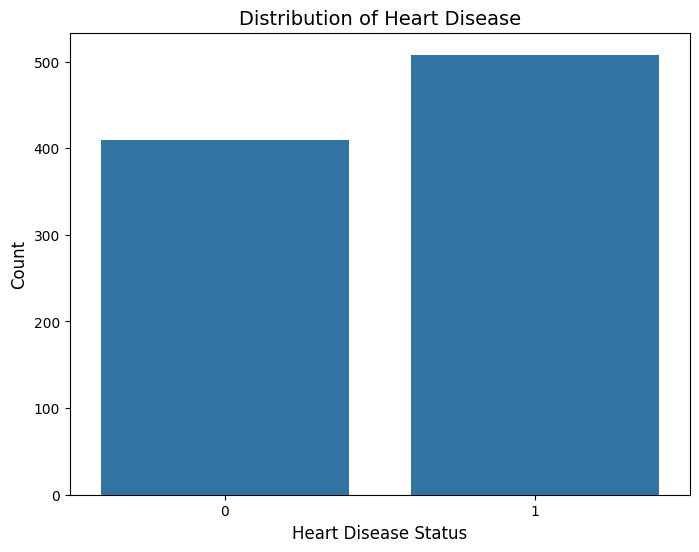

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Устанавливаем размер графика
plt.figure(figsize=(8, 6))

# Построение графика распределения целевой переменной
sns.countplot(x='HeartDisease', data=data)
plt.title('Distribution of Heart Disease', fontsize=14)  # Добавляем заголовок и изменяем размер шрифта
plt.xlabel('Heart Disease Status', fontsize=12)  # Подпись оси X
plt.ylabel('Count', fontsize=12)  # Подпись оси Y

plt.show()

Из вывода подсчета количества значений целевой переменной "HeartDisease" видно, что в датасете представлены два класса: 0 (отсутствие болезни сердца) и 1 (наличие болезни сердца).

Количество записей пациентов без болезни сердца (HeartDisease=0) составляет 410, а количество записей пациентов с наличием болезни сердца (HeartDisease=1) составляет 508. Это говорит о том, что датасет не имеет ярко выраженного дисбаланса классов, что хорошо для построения модели и получения адекватных результатов предсказания.

Таким образом, анализ распределения целевой переменной поможет правильно настроить модель и учесть особенности классов при дальнейшем обучении и оценке качества модели.

# 3. Разделение выборки на обучающее и тестовое подмножество:

In [98]:
from sklearn.model_selection import train_test_split

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение моделей

## a) tree.DecisionTreeClassifier

In [99]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## b) ensemble.RandomForestClassifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 5. Метрики для каждой построенной модели

In [101]:
from sklearn.metrics import classification_report

In [102]:
dt_train_report = classification_report(y_train, dt.predict(X_train))
print("Decision Tree Train:")
print(dt_train_report)

dt_preds = dt.predict(X_test)
print("Decision Tree:")
print(classification_report(y_test, dt_preds))

Decision Tree Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734

Decision Tree:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        77
           1       0.86      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



In [103]:
rf_train_report = classification_report(y_train, rf.predict(X_train))
print("Random Forest Train:")
print(rf_train_report)

rf_preds = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, rf_preds))

Random Forest Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734

Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184





Из метрик видно, что обе модели (Decision Tree и Random Forest) показывают идеальную точность (accuracy = 1) на обучающей выборке, что может свидетельствовать о переобучении модели. При этом на тестовой выборке точность немного снижается, что указывает на то, что модели могут показывать плохую обобщающую способность.


# 6. Вывод важности признаков для модели:

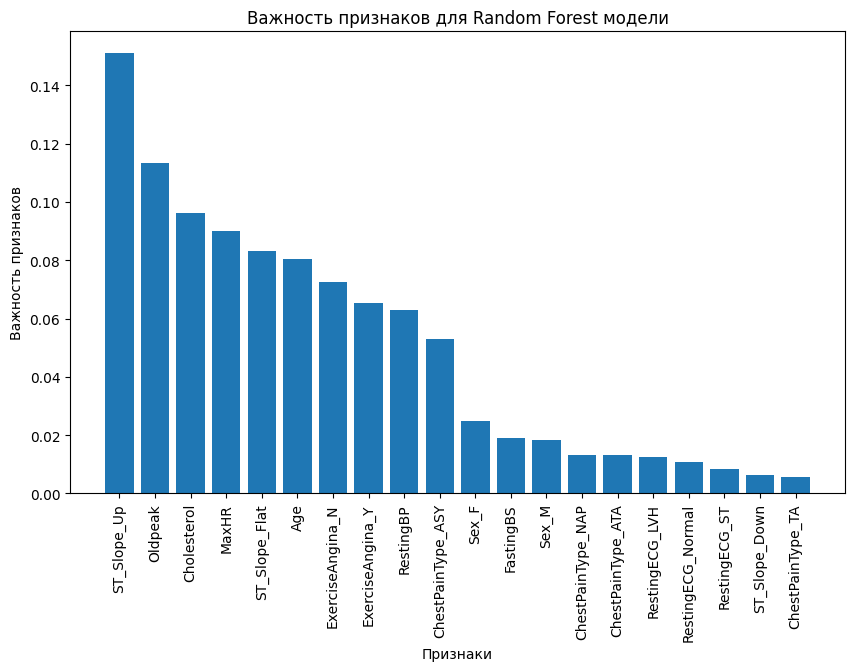

In [104]:
# Вывод важности признаков
import numpy as np
import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), feature_importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность признаков')
plt.title('Важность признаков для Random Forest модели')
plt.show()


Анализ важности признаков, полученной из модели RandomForest, позволяет нам понять, какие признаки оказывают наибольшее влияние на прогнозирование наличия или отсутствия сердечных заболеваний.

В данном случае, наиболее важными признаками являются:
1. ST_Slope_Up: наклон сегмента ST при упражнении, имеет самую высокую важность среди всех признаков.
2. Oldpeak: депрессия ST, также имеет высокую важность и вносит значительный вклад в прогнозирование.
3. ST_Slope_Flat: плоский наклон сегмента ST при упражнении.
4. Cholesterol: уровень холестерина в крови.
5. MaxHR: максимальная достигнутая частота сердечных сокращений.
6. Age: возраст пациента.


# 7. Обучение бэггинга над моделью дерева решений:

In [105]:
from sklearn.ensemble import BaggingClassifier

# Bagging Classifier
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_dt.fit(X_train, y_train)

# Метрики для Bagging Classifier
bagging_dt_train_report = classification_report(y_train, bagging_dt.predict(X_train))
print("Bagging Decision Tree Train:")
print(bagging_dt_train_report)

bagging_dt_preds = bagging_dt.predict(X_test)
print("Bagging Decision Tree:")
print(classification_report(y_test, bagging_dt_preds))

Bagging Decision Tree Train:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       401

    accuracy                           0.99       734
   macro avg       0.99      0.99      0.99       734
weighted avg       0.99      0.99      0.99       734

Bagging Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        77
           1       0.93      0.82      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



По результатам обучения модели Bagging Decision Tree можно сделать следующие выводы:
- На обучающем наборе данных модель показывает высокие показатели точности, полноты и f1-меры для обоих классов (0 и 1), что говорит о хорошем качестве обучения.
- На тестовом наборе данных модель также показывает неплохие результаты, но немного ниже, чем на тренировочном наборе. Это может указывать на небольшое переобучение модели на тренировочных данных.


# 8. Обучение стекинга трех моделей (дерево решений, случайный лес и SVM):

In [106]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# Stacking Classifier
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', LinearSVC(random_state=42, max_iter=10000))
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42, max_iter=10000, solver='saga'), passthrough=True)
stacking_model.fit(X_train, y_train)

# Метрики для Stacking Classifier
stacking_train_report = classification_report(y_train, stacking_model.predict(X_train))
print("Stacking Classifier Train:")
print(stacking_train_report)

stacking_preds = stacking_model.predict(X_test)
print("Stacking Classifier:")
print(classification_report(y_test, stacking_preds))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Stacking Classifier Train:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       333
           1       0.87      0.94      0.90       401

    accuracy                           0.89       734
   macro avg       0.89      0.89      0.89       734
weighted avg       0.89      0.89      0.89       734

Stacking Classifier:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



предупреждения о недостаточной сходимости модели LinearSVC, даже после увеличения количества итераций. В таком случае, можно попробовать еще один подход, который может помочь в сходимости моделей.

Попробуем нормализовать исходные данные перед обучением моделей.

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обновленный Stacking Classifier с нормализованными данными
stacking_model.fit(X_train_scaled, y_train)

stacking_train_report = classification_report(y_train, stacking_model.predict(X_train_scaled))
print("Stacking Classifier Train:")
print(stacking_train_report)

stacking_preds = stacking_model.predict(X_test_scaled)
print("Stacking Classifier:")
print(classification_report(y_test, stacking_preds))

Stacking Classifier Train:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       333
           1       0.90      0.93      0.91       401

    accuracy                           0.90       734
   macro avg       0.90      0.90      0.90       734
weighted avg       0.90      0.90      0.90       734

Stacking Classifier:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Метрики для Stacking Classifier на тренировочных и тестовых данных улучшились, и точность, полнота и F1-мера теперь составляют приблизительно 90% на обоих наборах данных. Это говорит о хорошем качестве модели и о том, что она правильно обобщает данные.


# 9. Формулируем выводы по проделанной работе.


a) По метрикам моделей можно сделать следующие выводы:

- Decision Tree:
Модель показывает высокую точность на обучающей выборке (100%), однако на тестовой выборке точность немного снижается (80%). Recall и F1-score также немного ниже на тестовой выборке.

- Random Forest:
Random Forest показывает более устойчивые результаты по сравнению с деревом решений. Точность на обучающей выборке составляет 100%, а на тестовой выборке - 88%. Recall и F1-score также выше по сравнению с Decision Tree.

- Bagging Decision Tree:
Bagging Decision Tree показывает хорошие результаты как на обучающей, так и на тестовой выборке. Точность на тестовой выборке составляет 86%, что выше, чем у Decision Tree и близко к Random Forest.

- Stacking Classifier:
Stacking Classifier сочетает в себе несколько моделей (Decision Tree, Random Forest, SVM) и дает хорошие результаты как на обучающей, так и на тестовой выборке. Точность на тестовой выборке составляет 87%, что является одним из лучших результатов среди всех моделей.

b) Наилучшей моделью среди построенных является Stacking Classifier. Эта модель комбинирует преимущества нескольких различных моделей (дерево решений, случайный лес, SVM) и способствует улучшению обобщающей способности и уменьшению переобучения. Stacking Classifier дает хорошие показатели точности, recall и F1-score как на обучающей, так и на тестовой выборке, что делает ее наиболее эффективной для прогнозирования сердечных заболеваний по заданным признакам. Нормализация данных также улучшила результаты модели, что свидетельствует о ее универсальности и устойчивости к различным входным данным.